# Coursework 1

Please enter your name and student number into the Markdown cell below.

#### Name: Yuyang Zhang
#### Student Number: 11169535

This piece of coursework will test you on what you have learnt in the first half of the course. As with the formative coursework, the marks available are indicated for each question. Input your answers into the code and markdown cells provided.

Your coursework will be marked using the same version of Python as is available in the Simon building computer cluster. It is your responsibility to ensure that your code works in this version of Python. If your code does not run correctly due to incompatibility issues between the version of Python you used and the version that is used to mark your coursework, you will not get the marks! Therefore, it is recommended that you test your code in the Simon building cluster before you submit.

In this piece of coursework, we are going to model the oscillations of a damped spring (which might be used in a car's suspension, for example) which is subjected to a time-varying forcing (which could be caused by the driver's pattern of acceleration and braking and the associated interacation of the car with the road's surface). This problem can be modelled by the following differential equation:

$$\frac{d^2u(t)}{dt^2}+D\frac{du(t)}{dt}+Su(t)=f(t),$$

where $u(t)$ is the displacement of the spring in mm at time $t$ seconds, $D$ is a constant associated with the spring's damping, $S$ is a constant associated with its stiffness and $f(t)$ is a function that represents the time-varying forcing. The specific form of $f(t)$ you will be asked to use will be generated based on your student ID number (this should be something like 9023839). Please enter it into the code below after the equals sign on the first row, then run the code. You will then see a printed message telling you what form of $f(t)$ to use for the rest of the coursework. It is essential that you enter the correct student ID number, otherwise you may be accused of plagiarism.

In [1]:
ID=11169535 #EDIT THIS LINE ONLY TO ENTER YOUR ID NUMBER, THEN INPUT THE CELL

Ta,Tb,Tc,Td,Te=0.003*(ID % 2),0.01*(ID % 8),0.3*(ID % 2+1),4*(ID % 4),(ID % 19)
print('For the rest of this coursework, please use f(t) =',Ta,'t^4 -',Tb,'t^3 +',Tc,'t^2 -',Td,'t +',Te)
del Ta,Tb,Tc,Td,Te

For the rest of this coursework, please use f(t) = 0.003 t^4 - 0.07 t^3 + 0.6 t^2 - 12 t + 5


In the message above, the symbol <code>^</code> means "to the power of"; so, for example <code>t^3</code> represents $t^3$. Later, we will be using your student ID to generate other pieces of information (such as initial and boundary conditions), so please don't create any new variables called <code>ID</code>! Other temporary variables introduced throughout this coursework begin with a captical <code>T</code> such <code>Ta</code>, <code>TD</code> and <code>Ta1</code>, so to be safe, do not create any new variables that begin with a <code>T</code> and __do not edit any of the code provided__.

As a final tip, __make sure that you report all quantities to an appropriate number of significant figures and include the correct units in all of your answers and axes labels__. You will lose marks if these are incorrect or omitted.

#### <span style="color: red"> Task 1:</span> Solve the governing equation to determine the spring's displacement $u(t)$ using the Euler Forward Method <span style="color: red"> (11 marks)</span>

We will assume that we know the displacement $u_0$ and rate of change of displacement $v_0$ at time

$$u(0)=u_0,\hspace{0.5cm}\text{and}\hspace{0.5cm}u'(0)=v_0.$$

The numerical values of $D$, $S$, $u_0$ and $v_0$ you should use are determined using your student ID number by the code below.

In [2]:
TD,TS,Tu0,Tv0=(ID % 19)/20+0.1,(ID % 17)/20+1.5,(ID % 200),(ID % 101)/10
print('Please use D =',TD,', S =',TS,', u0 =',Tu0,'and v0 =',Tv0)
del TD,TS,Tu0,Tv0

Please use D = 0.35 , S = 1.9 , u0 = 135 and v0 = 4.6


In [3]:
D=0.35
S=1.9

Compare your numerical solution to the exact solution, which for your $f(t)$ is generated by the code below, by plotting them both on the same set of axes.

In [4]:
TD,TS,Tu0,Tv0,Ta,Tb,Tc,Td,Te=(ID % 19)/20+0.1,(ID % 17)/20+1.5,(ID % 200),(ID % 101)/10,0.003*(ID % 2),0.01*(ID % 8),0.3*(ID % 2+1),4*(ID % 4),(ID % 19)
Ta1,Ta2,Ta4,Ta5,Ta6,Ta7,Ta8=TD/2,((-TD**2+4*TS)**0.5)/2,Ta/TS,-Tb/TS-4*Ta*TD/TS**2,Tc/TS+3*Tb*TD/TS**2+12*Ta*TD**2/TS**3-12*Ta/TS**2,-Td/TS+6*Tb/TS**2+48*Ta*TD/TS**3-2*Tc*TD/TS**2-6*Tb*TD**2/TS**3-24*Ta*TD**3/TS**4,Te/TS-2*Tc/TS**2-12*Tb*TD/TS**3-72*Ta*TD**2/TS**4+Td*TD/TS**2+24*Ta/TS**3+2*Tc*TD**2/TS**3+6*Tb*TD**3/TS**4+24*Ta*TD**4/TS**5
TA,TB=Tu0-Ta8,(Tv0+Ta1*Tu0-Ta1*Ta8-Ta7)/Ta2
print('The exact solution to compare to is u (t) = e^(-',"%.3g" % Ta1,'t)(',"%.3g" % TA, 'cos(', "%.3g" % Ta2,'t)+',"%.3g" % TB, ' sin(',"%.3g" % Ta2,'t))',"%+.3g" % Ta4,'t^4',"%+.3g" % Ta5,'t^3',"+%.3g" % Ta6,'t^2',"%+.3g" % Ta7,'t',"%+.3g" % Ta8)
del TD,TS,Tu0,Tv0,Ta,Tb,Tc,Td,Te,Ta1,Ta2,Ta4,Ta5,Ta6,Ta7,Ta8

The exact solution to compare to is u (t) = e^(- 0.175 t)( 132 cos( 1.37 t)+ 24.8  sin( 1.37 t)) +0.00158 t^4 -0.038 t^3 +0.327 t^2 -6.32 t +3.45


Discretise the domain into 1000 pieces and enter your answer into the code cell below. Calculate and plot the solution over a period of ten seconds.

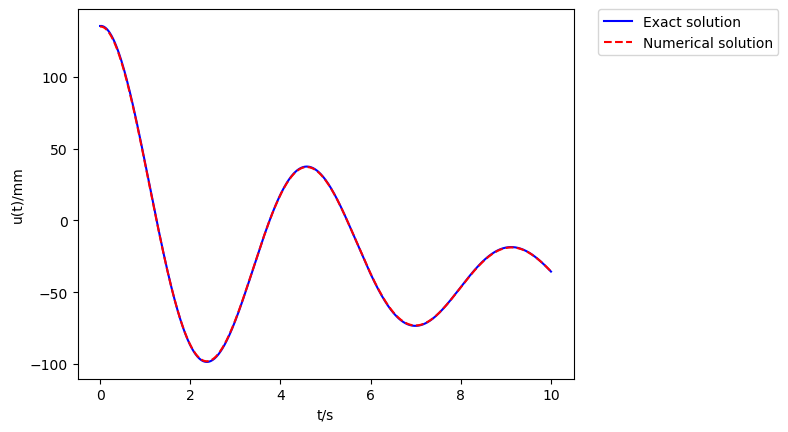

In [5]:
import numpy as np #import numpy package as np
import matplotlib.pyplot as plt #import pyplot from matplotlib as plt
u=[135]#set initial value for u
v=[4.6]#set initial value for v
x0=0 #set initial time
xN=10 #set final time
N=1000 #set number of timestep to divide time into
h=(xN-x0)/N #calculate the instance

x=np.linspace(x0,xN,N+1) #set up an array of input time values
X=np.linspace(x0,xN-h,N) #set up an array of time values excluding x=10

for t in X:
    f=0.003*t**(4)-0.07*t**(3)+0.6*t**(2)-12*t+5
    v.append(v[-1]+h*(f-D*v[-1]-S*u[-1])) #for each step, calculate the value of v.
    u.append(u[-1]+h*v[-2]) #for each step, calculate the value of u
    
plt.plot(x,np.exp(-0.175*x)*(132*np.cos(1.37*x) + 24.8*np.sin(1.37*x)) + 0.00158*x**4 - 0.038*x**3 + 0.327*x**2 - 6.32*x + 3.45,'-b', label="Exact solution") #plot exact solution
plt.plot(x,u,'--r', label="Numerical solution") #plot numerical solution
plt.xlabel('t/s') #label horizontal axis
plt.ylabel('u(t)/mm') #label vertical axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend

To test our modelling prediction, let's assume an experiment was carried out that measured the displacement of the spring at 1001 time points over a ten second period. The code below generates some data to simulate this experiment and stores it in a variable called <code>data</code>.

In [6]:
import numpy as np
np.random.seed(ID)
Tt=np.linspace(0,10,1001)
TD,TS,Tu0,Tv0,Ta,Tb,Tc,Td,Te=(ID % 19)/20+0.1,(ID % 17)/20+1.5,(ID % 200),(ID % 101)/10,0.003*(ID % 2),0.01*(ID % 8),0.3*(ID % 2+1),4*(ID % 4),(ID % 19)
Ta1,Ta2,Ta4,Ta5,Ta6,Ta7,Ta8=TD/2,((-TD**2+4*TS)**0.5)/2,Ta/TS,-Tb/TS-4*Ta*TD/TS**2,Tc/TS+3*Tb*TD/TS**2+12*Ta*TD**2/TS**3-12*Ta/TS**2,-Td/TS+6*Tb/TS**2+48*Ta*TD/TS**3-2*Tc*TD/TS**2-6*Tb*TD**2/TS**3-24*Ta*TD**3/TS**4,Te/TS-2*Tc/TS**2-12*Tb*TD/TS**3-72*Ta*TD**2/TS**4+Td*TD/TS**2+24*Ta/TS**3+2*Tc*TD**2/TS**3+6*Tb*TD**3/TS**4+24*Ta*TD**4/TS**5
TA,TB=Tu0-Ta8,(Tv0+Ta1*Tu0-Ta1*Ta8-Ta7)/Ta2
Tu=np.exp(-Ta1*Tt)*(TA*np.cos(Ta2*Tt)+TB*np.sin(Ta2*Tt))+Ta4*Tt**4+Ta5*Tt**3+Ta6*Tt**2+Ta7*Tt+Ta8
Tu=Tu+np.random.normal(0,abs(max(Tu)-min(Tu))/10,1001)
data=np.transpose(np.array([Tt,Tu]))
del Tt,Tu,TD,TS,Tu0,Tv0,Ta,Tb,Tc,Td,Te,Ta1,Ta2,Ta4,Ta5,Ta6,Ta7,Ta8

#### <span style="color: red"> Task 2:</span> Plot the numerical prediction made in Task 1 over the experimental data, plot the residuals showing the difference between the predicted solution and the experimental data and calculate the associated mean absolute error <span style="color: red"> (3 marks)</span>

If you did not manage to calculate a numerical prediction using the Euler Forward Method, you can use the exact solution instead.

#### Plot of prediction over experimental data:

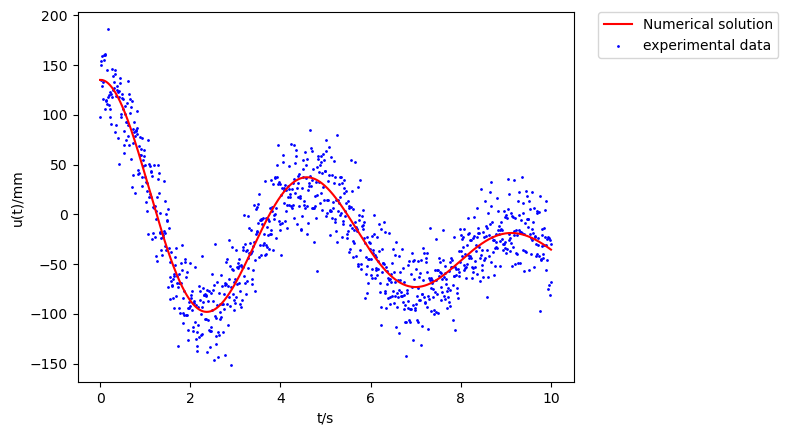

In [7]:
plt.plot(x,u,'r', label="Numerical solution") #plot numerical solution
plt.scatter(x,data[:,1],s=1, c='blue', marker='o', alpha=1,label="experimental data")#plot experimental data
plt.xlabel('t/s') #label horizontal axis
plt.ylabel('u(t)/mm') #label vertical axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend

#### Residual plot and mean absolute error:

The mean absolute error of the experiment is  19.3


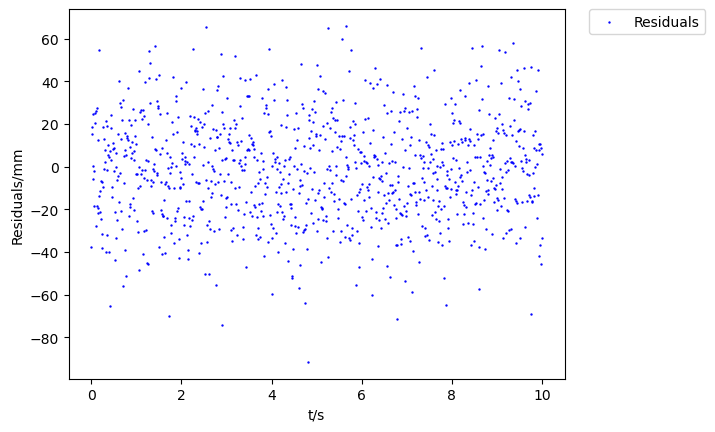

In [8]:
res=data[:,1]-u #Calculate residuals
plt.scatter(x, res,s=0.5, c='blue', marker='o', alpha=1,label="Residuals") #plot residuals
plt.xlabel('t/s') #label horizontal axis
plt.ylabel('Residuals/mm') #label vertical axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend
AbsErrors=abs(res)
MeanAbs=np.mean(AbsErrors)
print('The mean absolute error of the experiment is ',"%.3g" % MeanAbs )

#### <span style="color: red"> Task 3:</span> Analyse the residuals statistically<span style="color: red"> (6 marks)</span>

Plot the residuals as a histogram with 50 bins in relative frequency form, fit a normal distribution to them, plot it over the histogram, and report the _variance_ of the fitted distribution. Then use hypthesis testing to determine whether the residuals are normally distributed at the 5% significance level. Report the conclusion of the test as a sentence, giving the calculated p-value.

The variance of the fitted distribution is sigma= 583
The data is normally distributed,and the p-value = 0.9760720283831334


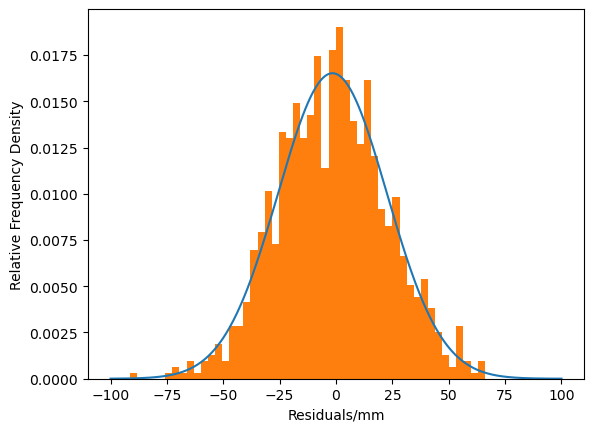

In [9]:
import itertools #import itertools
from scipy import stats
merged=list(itertools.chain(res)) #create a list called merged containing all the entries of the array

from scipy.stats import norm #import norm from scipy.stats
mu, sigma = norm.fit(merged) #fit a normal distribution to the data and calculate the values of mu and sigma
x1 = np.linspace(-100,100,501) #create an array of x values to use when plotting the distribution

plt.plot(x1, norm.pdf(x1,mu,sigma)) #plot the fitted distribution
plt.hist(merged,50,density=True) #plot merged as a histogram
plt.xlabel('Residuals/mm') #label horizontal axis
plt.ylabel('Relative Frequency Density'); #label vertical axis

variance=np.std(merged)**2
print('The variance of the fitted distribution is sigma=',"%.3g"%variance)

k2, p = stats.normaltest(merged) #calculate the test statistic and p-value
alpha = 0.05 #set a threshold for accepting/rejecting the null hypothesis

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The data isn't normally distributed,and the p-value =",p)
else:
    print("The data is normally distributed,and the p-value =",p)

Unit

#### <span style="color: red"> Task 4:</span> Solve the governing equation to determine the spring's displacement $u(t)$ using the Finite Element Method <span style="color: red"> (10 marks)</span>

We will now assume that we instead know both the initial displacement $u_0$ and the displacement after 1 second $u_1$, so that we have

$$u(0)=u_0,\hspace{0.5cm}\text{and}\hspace{0.5cm}u(1)=u_1,$$

and we want to calculate the displacement at an arbitrary time between 0 and 1 seconds.

The numerical values of $u_0$ and $u_1$ you should use are determined using your student ID number by the code below.

In [10]:
print('Please use u0 =',(ID % 100)-50,'and u1 =',(ID % 101)-50)

Please use u0 = -15 and u1 = -4


Compare your numerical solution to the exact solution, which for your $f(t)$ is generated by the code below, by plotting them both on the same set of axes over the time range from 0 to 1 seconds.

In [11]:
TD,TS,Tu0,Tu1,Ta,Tb,Tc,Td,Te,Tf=(ID % 19)/20+0.1,(ID % 17)/20+1.5,(ID % 100)-50,(ID % 101)-50,0.003*(ID % 2),0.01*(ID % 8),0.3*(ID % 2+1),4*(ID % 4),(ID % 19),1
Ta1,Ta2,Ta4,Ta5,Ta6,Ta7,Ta8=TD/2,((-TD**2+4*TS)**0.5)/2,Ta/TS,-Tb/TS-4*Ta*TD/TS**2,Tc/TS+3*Tb*TD/TS**2+12*Ta*TD**2/TS**3-12*Ta/TS**2,-Td/TS+6*Tb/TS**2+48*Ta*TD/TS**3-2*Tc*TD/TS**2-6*Tb*TD**2/TS**3-24*Ta*TD**3/TS**4,Te/TS-2*Tc/TS**2-12*Tb*TD/TS**3-72*Ta*TD**2/TS**4+Td*TD/TS**2+24*Ta/TS**3+2*Tc*TD**2/TS**3+6*Tb*TD**3/TS**4+24*Ta*TD**4/TS**5
TA,TB=Tu0-Ta8,((-Ta8-Ta7*Tf-Ta6*Tf**2-Ta5*Tf**3-Ta4*Tf**4+Tu1)*np.exp(Ta1*Tf)+(Ta8-Tu0)*np.cos(Ta2*Tf))/np.sin(Ta2*Tf)
print('The exact solution to compare to is u(t) = e^(-',"%.3g" % Ta1,'t)(',"%.3g" % TA, 'cos(', "%.3g" % Ta2,'t)+',"%.3g" % TB, ' sin(',"%.3g" % Ta2,'t))',"%+.3g" % Ta4,'t^4',"%+.3g" % Ta5,'t^3',"+%.3g" % Ta6,'t^2',"%+.3g" % Ta7,'t',"%+.3g" % Ta8)
del TD,TS,Tu0,Tu1,Ta,Tb,Tc,Td,Te,Ta1,Ta2,Ta4,Ta5,Ta6,Ta7,Ta8

The exact solution to compare to is u(t) = e^(- 0.175 t)( -18.5 cos( 1.37 t)+ 2.07  sin( 1.37 t)) +0.00158 t^4 -0.038 t^3 +0.327 t^2 -6.32 t +3.45


Calculate expressions for the residuals, $r_k$, and the Jacobian, $J_{kj}$, and write them in the Markdown cell below using LaTeX to ensure your mathematics is formatted correctly.

Governing equation is:
$$\frac{d^{2} u(t)}{d t^{2}}+D \frac{d u(t)}{d t}+Su(t)=f(t)$$

Rewrite in functional:

$$ R=\frac{d^{2} u(t)}{d t^{2}}+D \frac{d u(t)}{d t}+S u(t)-f(t)=0$$


Rewrite in weak form:

$$R=\int_{0}^{1} \phi(t)\left(\frac{d^{2} u(t)}{d t^{2}}+D \frac{d u(t)}{d t}+S u(t)-f(t)\right)d t=0$$


Seperate  u(t)  into homogeneous solution and particuar solution

$$u(t)=u_{p}(t)+u_{h}(t)$$


Homogeneous solution u(t) can be expressed by the weighted sum of different orders of the basis set

$$u_{h}(t)=\sum_{j=1}^{\infty} U_{j} \psi_{j}(x)$$


So residual can be expressed as:

$$r= \int_{0}^{1} \phi_{k}(t) \left(\frac{d^{2} u_{p}(t)}{d t^{2}}+\sum_{j=1}^{\infty} U_{j} \frac{d^{2} \psi_{j}(t)}{d t^{2}}+D \frac{d u_{p}(t)}{d t}+D \sum_{j=1}^{\infty}  U_{j} \frac{d \psi_{j}(t)}{d t}+S u_{p}(t)+S\sum_{j=1}^{\infty}  U_{j} \psi_{j}(t)-f(t)\right) d t=0$$

using same basis set to expand weight function

$$\phi(t)=\sum_{k=1}^{\infty} U_{k} \psi_{k}(t)$$


Because  Uk  are all constant, so

$$r_{k}=\int_{0}^{1} \psi_{k}(t)\left(\frac{d^{2} u_{p}(t)}{d t^{2}}+\sum_{j=1}^{\infty} U_{j} \frac{d^{2} \psi_{j}(t)}{d t^{2}}+D \frac{d u_{p}(t)}{d t}+D \sum_{j=1}^{\infty}  U_{j} \frac{d \psi_{j}(t)}{d t}+S u_{p}(t)+S \sum_{j=1}^{\infty}  U_{j} \psi_{j}(t)-f(t)\right) d t$$



Only expand the rest into N nodal point.The Jacobian matrix equals to $$J_{k j}=\left.\frac{\partial r_{k}}{\partial U_{j}}\right|_{U_{1}, U_{2} \cdots U_{N}} $$

$$J_{k j} = \int_{0}^{1} \psi_{k}(t)\left(\frac{d^{2} \psi_{j}(t)}{d t} + D \frac{d \psi_{j}(t)}{d t} + S \psi_{j}(t)\right) d t \ \Bigg|_{U_{1}, U_{2} \cdots U_{N}}$$

Integrate by part so second derivative can be expressed by product of two first derivate.
Since on boundary, basis set equals to zero so the antiderivative is also zero. Only expand the rest into N nodal point.

$$r_{k}\left(U_{1} \cdots U_{N}\right)=-\int_{0}^{1}\left(\frac{d U_{p}(t)}{d t} \frac{d \psi_{k}(t)}{d t}+\sum_{j=2}^{N-1} U_{j} \frac{d \psi_{j}(t)}{d t} \frac{d \psi_{k}(t)}{d t}+D U_{p}(t) \frac{d \psi_{k}(t)}{d t}+D \sum_{j=2}^{N-1} U_{j} \psi_{j}(t) \frac{d \psi_{k}(t)}{d t}-S U_{p}(t) \psi_{k}(t)-S \sum_{j=2}^{N-1} U_{j} \psi_{j}(t) \psi_{k}(t)+f\left ( t \right ) \psi_{k}\left ( t \right )\right)d t,\hspace{1mm}\text{for}\hspace{1mm}j,k=2,3,...,N-1$$


$$J_{kj} = -\int_0^1 \left( \frac{d\psi_j(t)}{dt} \frac{d\psi_k(t)}{dt} + D \psi_j(t) \frac{d\psi_k(t)}{dt} - S \psi_j(t) \psi_k(t) \right) dt \hspace{1cm}\text{for}\hspace{1cm}j,k=2,3,...,N-1$$

Use linear finite element shape functions, 12 nodal points and enter your answer into the code cell below.12 node

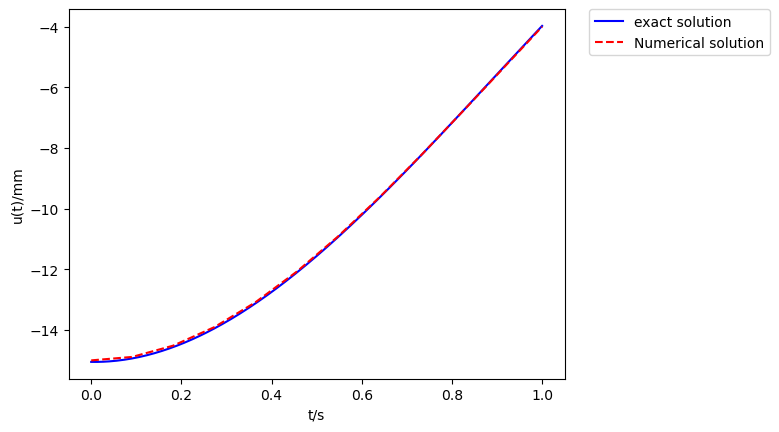

In [14]:
#for numerical solution:
import scipy.integrate as integrate #import numerical integration functionality from scipy
from scipy.integrate import quad
def LFESF(x,j,N): #define a function called LFESF (which stands for linear finite element shape function)
    Xj=(j-1)/(N-1) #define X_j
    Xjminus=(j-2)/(N-1) #define X_{j-1}
    Xjplus=j/(N-1) #define X_{j+1}
    if x<Xjminus:
        output=0.0
    else:
        if x<Xj:
            output=(x-Xjminus)/(Xj-Xjminus)
        else:
            if x<Xjplus:
                output=(Xjplus-x)/(Xjplus-Xj)
            else:
                output=0.0
    return output

def LFESFVector(x,j,N): #a version of the above that accepts a vector as the input
    output=np.zeros(len(x))
    for xj in range(len(x)): 
        output[xj]=LFESF(x[xj],j,N)
    return output

def DLFESF(x,j,N): #define a function called DLFESF (which stands for derivative of linear finite element shape function)
    Xj=(j-1)/(N-1) #define X_j
    Xjminus=(j-2)/(N-1) #define X_{j-1}
    Xjplus=j/(N-1) #define X_{j+1}
    if x<Xjminus:
        output=0.0
    else:
        if x<Xj:
            output=1/(Xj-Xjminus)
        else:
            if x<Xjplus:
                output=-1/(Xjplus-Xj)
            else:
                output=0.0
    return output

def DLFESFVector(x,j,N): #a version of the above that accepts a vector as the input
    output=np.zeros(len(x))
    for xj in range(len(x)): 
        output[xj]=DLFESF(x[xj],j,N)
    return output

#Algorithm 2 Step 1:

N=12 #the number of nodal points is 12

#Algorithm 2 Step 2:
U=np.ones(N-2) #set some initial guesses for the constants Uj - we only need U to have length N-2 since j ranges between 2 and N-1

#Algorithm 2 Step 3:
g0=-15 #left boundary condtion
g1=-4 #right boundary condition


def up(x): #define a function up that gives the particular solution that satisfies the boundary conditions 
    output=g0*LFESF(x,1,N)+g1*LFESF(x,N,N) #the function is given in terms of the linear finite element shape functions at either end of the domain
    return output

def Dup(x): #define a function up that gives the derivative of the particular solution 
    output=g0*DLFESF(x,1,N)+g1*DLFESF(x,N,N) #the function is given in terms of the derivatives of the linear finite element shape functions at either end of the domain
    return output

def uh(x,U):  #define a function uh that gives the solution that satisfies homogeneous boundary conditions 
    output=np.zeros(len(x)) #first we set the output up to have the right length
    LFESFList=np.zeros(len(U)) #and we make sure the list of linear finite element shape functions has the right length
    for xj in range(len(x)): #for each input x value...
        for k in range(len(U)): #and each entry in the list of consants U...
            LFESFList[k]=LFESF(x[xj],k+2,N) #we calculate the value of the associated linear finite element shape function
        output[xj]=sum(U*LFESFList) #and output the constants times the shape functions
    return output #and return the output

#Set up while loop
tol=0.01 #the tolerance is 0.01
maxres=tol+1 
while (maxres>tol):

#Algorithm 2 Step 4:
    r=np.zeros(N-2)
    myint=np.zeros(N-2)
    Nrange=range(N-2)
    for k in Nrange: 
        for j in Nrange: 
            myint[j]=integrate.quad(lambda x: (U[j]*DLFESF(x,j+2,N)*DLFESF(x,k+2,N))+(D*U[j]*LFESF(x,j+2,N)*DLFESF(x,k+2,N))-(S*U[j]*LFESF(x,j+2,N)*LFESF(x,k+2,N)),0,1,points=[(k-1)/(N-1),(k+1)/(N-1)],limit=100)[0] #All that include sum
        r[k]=-(integrate.quad(lambda x: (Dup(x)*DLFESF(x,k+2,N))+(D*up(x)*DLFESF(x,k+2,N))-(S*up(x)*LFESF(x,k+2,N)),0,1,limit=100)[0]+sum(myint)+integrate.quad(lambda x: (0.003*x**(4)-0.07*x**(3)+0.6*x**(2)-12*x+5)*LFESF(x,k+2,N),0,1,limit=100)[0]) #rest of the residual
    maxres=max(abs(r))

#Algorithm 2 Steps 5:    
    J=np.zeros((N-2,N-2))
    for j in range(N-2): 
        for k in range(N-2): 
            J[k,j]=-integrate.quad(lambda x: (DLFESF(x,j+2,N)*DLFESF(x,k+2,N))+(D*LFESF(x,j+2,N)*DLFESF(x,k+2,N))-(S*LFESF(x,j+2,N)*LFESF(x,k+2,N)),0,1,limit=100)[0]#calculate Jacobian matrix
    deltaU=np.linalg.solve(J,-r) #this step solves the matrix equation J.deltaU=-r for deltaU
        
#Algorithm 2 Step 6:        
    U=U+deltaU
    
#Algorithm 2 Step 7:  
def FinalU(x,U):
    output=np.zeros(len(x))
    LFESFList=np.zeros(len(U)) #and we make sure the list of linear finite element shape functions has the right length
    for xj in range(len(x)): 
        for k in range(len(U)): 
             LFESFList[k]=LFESF(x[xj],k+2,N) #we calculate the value of the associated linear finite element shape function
        output[xj]=up(x[xj])+sum(U*LFESFList) #we have changed our particular solution to Up(x)=1+x
    return output

#plot both exact and numerical solution
x=np.linspace(0,1,301)

plt.plot(x, np.exp(-0.175 * x) * (-18.5 * np.cos(1.37 * x) + 2.07 * np.sin(1.37 * x)) + 0.00158 * x**4 - 0.038 * x**3 + 0.327 * x**2 - 6.32 * x + 3.45,'-b', label="exact solution") #plot e^(- 0.175 t)( -18.5 cos( 1.37 t)+ 2.07  sin( 1.37 t)) +0.00158 t^4 -0.038 t^3 +0.327 t^2 -6.32 t +3.45
plt.plot(x,FinalU(x,U),'--r', label="Numerical solution") #plot numerical solution
plt.xlabel('t/s') #label horizontal axis
plt.ylabel('u(t)/mm') #label horizontal axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #plot legend

### For use by markers only:

#### Total mark: $\hspace{1cm}$/30

#### As a percentage: